In [21]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
from collections import defaultdict

from scipy import stats
from scipy.special import expit as logistic

In [2]:
d = pd.read_csv('Data/chimpanzees.csv', sep=';')
d.head()

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left
0,1,NaN,0,1,2,0,1,0
1,1,NaN,0,1,4,0,0,1
2,1,NaN,0,1,6,1,0,0
3,1,NaN,0,1,8,0,1,0
4,1,NaN,0,1,10,1,1,1


In [3]:
d.shape

(504, 8)

In [4]:
treatment = 1 + d.prosoc_left + 2 * d.condition
P = d.pulled_left
A = d.actor
B = d.block
T = treatment

In [5]:
actor_idx, actors = pd.factorize(d.actor)
treat_idx, treatments = pd.factorize(treatment)
block_idx, blocks = pd.factorize(d.block)

In [6]:
#centered version
with pm.Model() as mBT:
    
    ## hyper-priors
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_A = pm.Exponential('sigma_A', 1)
    sigma_B = pm.Exponential('sigma_B', 1)
    
    ## adaptive priors
    b = pm.Normal('b', 0, sigma_B, shape = (len(treatments), len(blocks)))
    a = pm.Normal('a', a_bar, sigma_A, shape = len(actors))
    
    p = pm.math.invlogit(a[actor_idx] + b[treat_idx, block_idx])
    
    prosoc_l = pm.Bernoulli("P", p=p, observed=P)

    trace_mBT = pm.sample(2000)

az.summary(trace_mBT, round_to=2)

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  app.launch_new_instance()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma_B, sigma_A, a_bar]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 37 seconds.
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.60,0.70,-0.74,1.92,0.01,0.01,4278.98,3710.52,1.00
"b[0,0]",-0.23,0.35,-0.93,0.37,0.01,0.01,3520.17,3879.39,1.00
"b[0,1]",-0.02,0.34,-0.67,0.64,0.00,0.00,7886.77,4967.21,1.00
"b[0,2]",0.31,0.36,-0.35,1.00,0.01,0.01,2560.77,4302.78,1.00
"b[0,3]",0.08,0.34,-0.53,0.78,0.00,0.00,7136.32,4731.19,1.00
"b[0,4]",-0.34,0.37,-1.04,0.32,0.01,0.01,3002.25,3807.00,1.00
"b[0,5]",-0.23,0.35,-0.90,0.41,0.01,0.00,4896.65,4778.75,1.00
"b[1,0]",0.09,0.33,-0.53,0.73,0.00,0.00,6443.90,4793.50,1.00
"b[1,1]",-0.02,0.33,-0.64,0.62,0.00,0.00,8138.12,5426.05,1.00
"b[1,2]",-0.12,0.34,-0.78,0.52,0.00,0.00,6613.28,4430.68,1.00


C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D152D84A48>,
      dtype=object)

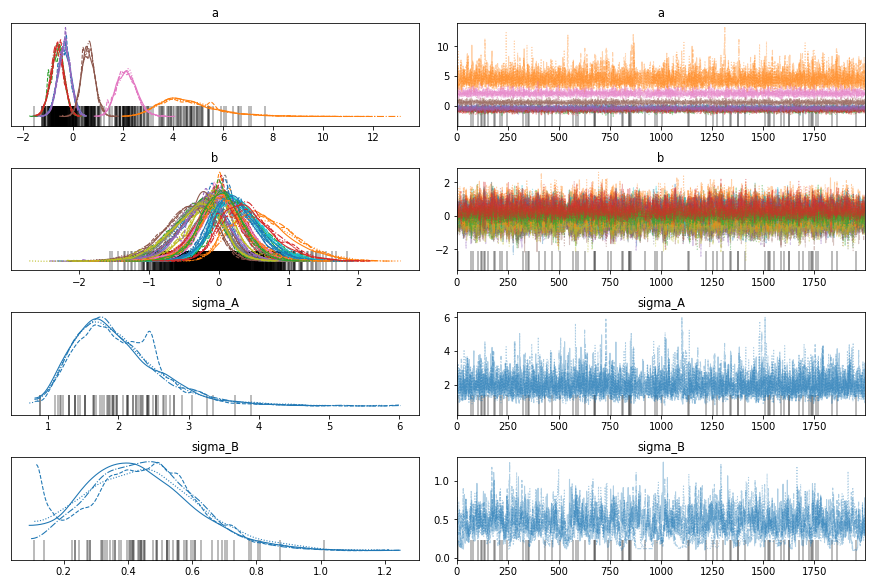

In [7]:
az.plot_trace(trace_mBT, var_names=['a', 'b', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D14F9C36C8>,
      dtype=object)

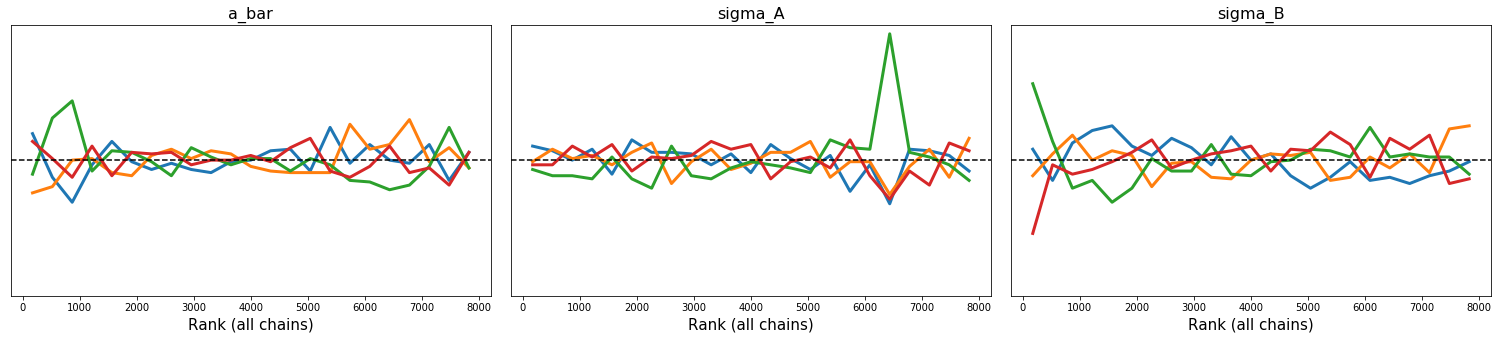

In [8]:
az.plot_rank(trace_mBT, var_names=['a_bar', 'sigma_A', 'sigma_B'], kind="vlines", vlines_kwargs={'lw':0}, marker_vlines_kwargs={'lw':3})

In [9]:
#non-centered version
coords = {
    "actor_idx": actor_idx, 
    "treat_idx": treat_idx,
    "block_idx": block_idx,
    "treatments": treatments,
    "actors": actors,
    "blocks": blocks
}
with pm.Model(coords=coords) as mBTnc:
    
    actor_id = pm.Data("actor_idx", actor_idx, dims="actor_idx")
    treat_id = pm.Data("treat_idx", treat_idx, dims="treat_idx")
    block_id = pm.Data("block_idx", block_idx, dims="block_idx")
    
    
    ## adaptive priors
    z_b = pm.Normal('z_b', 0,1, dims = ("treatments", "blocks"))
    z_a = pm.Normal('z_a', 0,1, dims = "actors")
    ## hyper-priors
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_A = pm.Exponential('sigma_A', 1)
    sigma_B = pm.Exponential('sigma_B', 1)
    
    p = pm.Deterministic("p", pm.math.invlogit(a_bar + z_a[actor_id]*sigma_A + z_b[treat_id, block_id]*sigma_B))
    
    a = pm.Deterministic("a", a_bar + z_a[actor_idx]*sigma_A)
    b = pm.Deterministic("b", z_b[treat_idx, block_idx]*sigma_B)
                         
    prosoc_l = pm.Bernoulli("P", p=p, observed=P)

    trace_mBTnc = pm.sample(2000)

az.summary(trace_mBTnc, round_to=2, var_names=['a_bar', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_B, sigma_A, a_bar, z_a, z_b]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 66 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,0.60,0.71,-0.80,1.89,0.02,0.02,1213.46,1224.40,1.0
sigma_A,2.00,0.65,0.98,3.24,0.02,0.01,2009.19,1817.69,1.0
sigma_B,0.45,0.18,0.08,0.77,0.00,0.00,2279.25,2230.66,1.0


C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1559D6A88>,
      dtype=object)

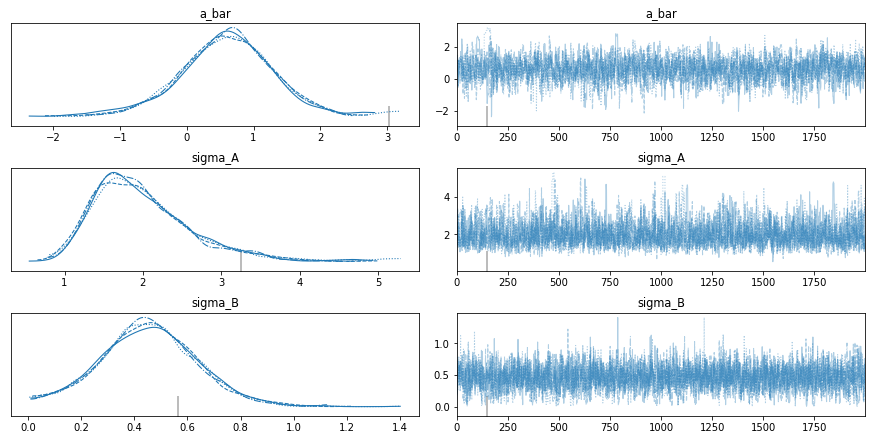

In [10]:
az.plot_trace(trace_mBTnc, var_names=['a_bar', 'sigma_A', 'sigma_B'])

C:\Users\skorus01\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D14FFBFD48>,
      dtype=object)

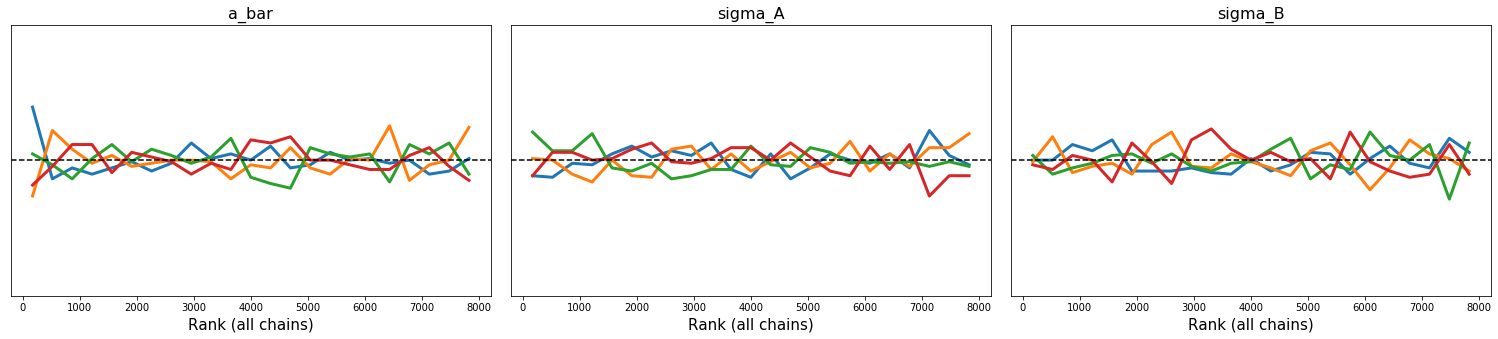

In [11]:
az.plot_rank(trace_mBTnc, var_names=['a_bar', 'sigma_A', 'sigma_B'], kind="vlines", vlines_kwargs={'lw':0}, marker_vlines_kwargs={'lw':3})

In [12]:
posterior_sample = az.from_pymc3(trace_mBTnc)
actors = posterior_sample.posterior.groupby('actors').mean(dim={"treatments", "blocks", "chain"})
actors_p = logistic(actors.a_bar + actors.z_a * actors.sigma_A + actors.z_b * actors.sigma_B)

In [43]:
actor_dict = defaultdict(list)
for i, arr in enumerate(actors_p):
    actor_dict['actor'].append(i)
    actor_dict['pull_left'].append(arr.to_numpy())
actor_df = pd.DataFrame.from_dict(actor_dict)

In [47]:
actor_df = actor_df.explode('pull_left')
actor_df['pull_left']=actor_df['pull_left'].astype('float64')

In [48]:
actor_df.head()

,actor,pull_left
0,0,0.380880
0,0,0.484664
0,0,0.453402
0,0,0.467308
0,0,0.411428


Text(0.5, 0.98, 'Actor effects')

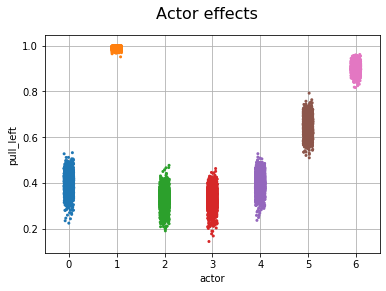

In [92]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,4))
sns.stripplot(x="actor", y="pull_left", size=3, data=actor_df, ax=ax1)
ax1.grid()
fig.suptitle('Actor effects', fontsize=16)

In [63]:
treatment_blocks = posterior_sample.posterior.groupby("treatments").mean(dim={"actors", "chain"})

In [83]:
treatment_blocks_lo = treatment_blocks.z_b * treatment_blocks.sigma_B
treatment_blocks_lo = treatment_blocks_lo.mean(dim={"draw"})

In [80]:
treatment_block_dict = defaultdict(list)
treat = ['R/N', 'L/N', 'R/P', 'L/P']
for t, arr in zip(treat, treatment_blocks_lo):
    treatment_block_dict['treatment'].append(t)
    treatment_block_dict['log_odds'].append(arr.to_numpy())
treatment_block_df = pd.DataFrame.from_dict(treatment_block_dict)
treatment_block_df = treatment_block_df.explode('log_odds')

In [81]:
treatment_block_df.head()

,treatment,log_odds
0,R/N,-0.234207
0,R/N,-0.014861
0,R/N,0.314814
0,R/N,0.084903
0,R/N,-0.346683


Text(0.5, 0.98, 'Treatment / Block effect')

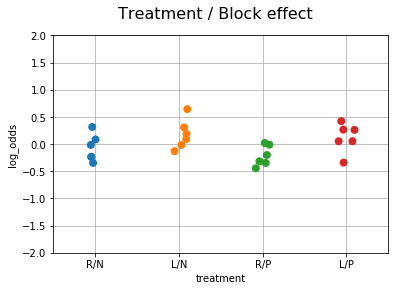

In [93]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,4))
sns.stripplot(x="treatment", y="log_odds", size=8, data=treatment_block_df, ax=ax1)
ax1.set_ylim([-2, 2])
ax1.grid()
fig.suptitle('Treatment / Block effect', fontsize=16)

In [94]:
pm.save_trace(trace_mBT, directory='./trace_mBT', overwrite=True)
pm.save_trace(trace_mBTnc, directory='./trace_mBTnc', overwrite=True)

'./trace_mBTnc'